## 영화리뷰 분석
---  
- IMBD 데이터 활용

### [1] 데이터 준비

In [1]:
from tensorflow.keras.datasets.imdb import load_data
import numpy as np

In [2]:
# 단어사전에서 빈도가 높은 500개만 사용
(X_train, y_train), (X_test, y_test) = load_data(num_words=500)

In [3]:
print(f'imDB 정보 \n X_train : {X_train.shape}  y_train : {y_test.shape}')
print(f'imDB 정보 \n X_test : {X_test.shape}  y_train : {y_test.shape}')

imDB 정보 
 X_train : (25000,)  y_train : (25000,)
imDB 정보 
 X_test : (25000,)  y_train : (25000,)


In [4]:
for dx in range(3):
    print(f'[{dx} - {y_train[dx]}]\n{len(X_train[dx])}\n{X_train[dx]}')

[0 - 1]
218
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 - 0]
189
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14

### [2] 학습용 데이터 변환
---  
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)

**패딩**

In [5]:
from tensorflow.keras.utils import pad_sequences

In [6]:
len(X_train[0])

218

In [7]:
list_len = []
for i in range(0, len((X_train))) :
    list_len.append(len(X_train[i]))

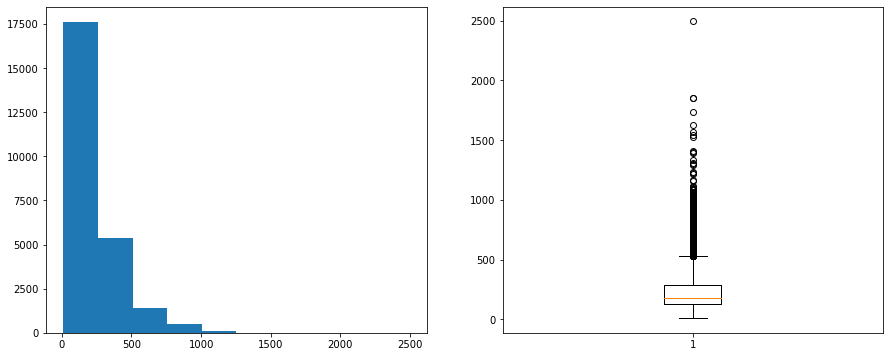

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist(list_len)
plt.subplot(122)
plt.boxplot(list_len)
plt.show()

In [9]:
import pandas as pd

In [10]:
df_len = pd.DataFrame(list_len)
df_len.columns = ['len']

In [11]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
                 
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [12]:
outlier_iqr(df_len, 'len')

IQR은 161.0 이다.
lower bound 값은 -111.5 이다.
upper bound 값은 532.5 이다.
총 이상치 개수는 1805 이다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


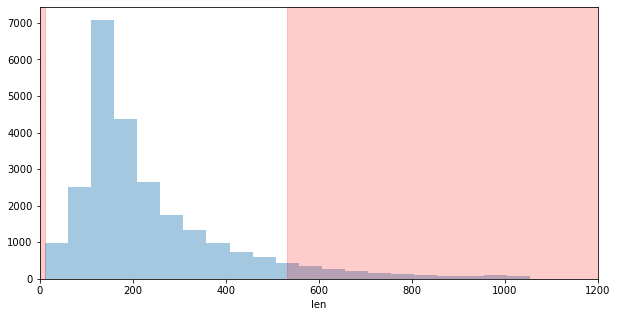

In [15]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df_len['len'], kde=False)

# 이상치 영역 박스 그리기

plt.axvspan(xmin=lower, xmax=df_len.len.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=df_len.len.max(), alpha=0.2, color='red')
plt.xlim(0, 1200)
plt.show()

In [14]:
# 데이터별 길이 변경
# 메모리 문제로 n_maxlen 180까지만...
n_maxlen = 180
X_train = pad_sequences(X_train, maxlen=n_maxlen)
X_test = pad_sequences(X_test, maxlen=n_maxlen)
print(X_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1   2 202  14  31   6   2  10  10   2   2   5   4 360
   7   4 177   2 394 354   4 123   9   2   2   2  10  10  13  92 124  89
 488   2 100  28   2  14  31  23  27   2  29 220 468   8 124  14 286 170
   8 157  46   5  27 239  16 179   2  38  32  25   2 451 202  14   6   2]


**원 핫 인코딩**

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
train_oh = to_categorical(X_train)

In [17]:
train_oh.shape

(25000, 180, 500)

**훈련/테스트 데이터 준비**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(
    train_oh, y_train, test_size = 0.2, random_state = 42)

In [20]:
print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(20000, 180, 500) (25000, 180) (5000, 180, 500)
(20000,) (25000,) (5000,)


### [3] 모델
---  
- 목표 : 영화리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
- 학습모델 : RNN 순환신경망
- 입력 : 533
- 출력 : 1 => 분류 (이진분류)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

**모델 구성**   

---  
- 입력층 :  노드 n개, input_shape = 533, 
- 출력층 :  노드 1개 sigmoid

In [38]:
model = Sequential()
model.add(SimpleRNN(18, input_shape = (n_maxlen, 500), name = 'input'))
model.add(Dense(36, name = 'hidden1'))
model.add(Dense(18, name = 'hidden2'))
model.add(Dense(9, name = 'hidden3'))
model.add(Dense(1, activation = 'sigmoid', name = 'output'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (SimpleRNN)           (None, 10)                5110      
                                                                 
 hidden1 (Dense)             (None, 20)                220       
                                                                 
 hidden2 (Dense)             (None, 10)                210       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 5,551
Trainable params: 5,551
Non-trainable params: 0
_________________________________________________________________


**모델생성**   

---  
- 손실함수, 최적화방법, 평가항목

In [35]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [25]:
X_train.shape

(20000, 180, 500)

### [4] 학습
---  
- trian 데이터와 타겟으로 학습 진행
- epoch 마다 검증 진행  => validation_data, validation_split
- 학습 중 이벤트 처리   => callbacks = []
- 학습 진행 내용 조절   => verbose
- 학습 횟수 조절        => epochs
- 배치사이즈 조절       => batch_size

In [26]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [36]:
history = model.fit(X_train, y_train, 
epochs = 30,
callbacks = callback,
validation_data=(X_val, y_val))

Epoch 1/10
625/625 [==============================] - 21s 33ms/step - loss: 0.6684 - accuracy: 0.5613 - val_loss: 0.5403 - val_accuracy: 0.7370
Epoch 2/10
625/625 [==============================] - 19s 31ms/step - loss: 0.4991 - accuracy: 0.7638 - val_loss: 0.5208 - val_accuracy: 0.7584
Epoch 3/10
625/625 [==============================] - 19s 30ms/step - loss: 0.4596 - accuracy: 0.7903 - val_loss: 0.4841 - val_accuracy: 0.7764
Epoch 4/10
625/625 [==============================] - 19s 30ms/step - loss: 0.4281 - accuracy: 0.8106 - val_loss: 0.5154 - val_accuracy: 0.7488
Epoch 5/10
625/625 [==============================] - 23s 37ms/step - loss: 0.4101 - accuracy: 0.8185 - val_loss: 0.4698 - val_accuracy: 0.7856
Epoch 6/10
625/625 [==============================] - 25s 39ms/step - loss: 0.3908 - accuracy: 0.8336 - val_loss: 0.4670 - val_accuracy: 0.7992
Epoch 7/10
625/625 [==============================] - 23s 36ms/step - loss: 0.3874 - accuracy: 0.8324 - val_loss: 0.4937 - val_accuracy:

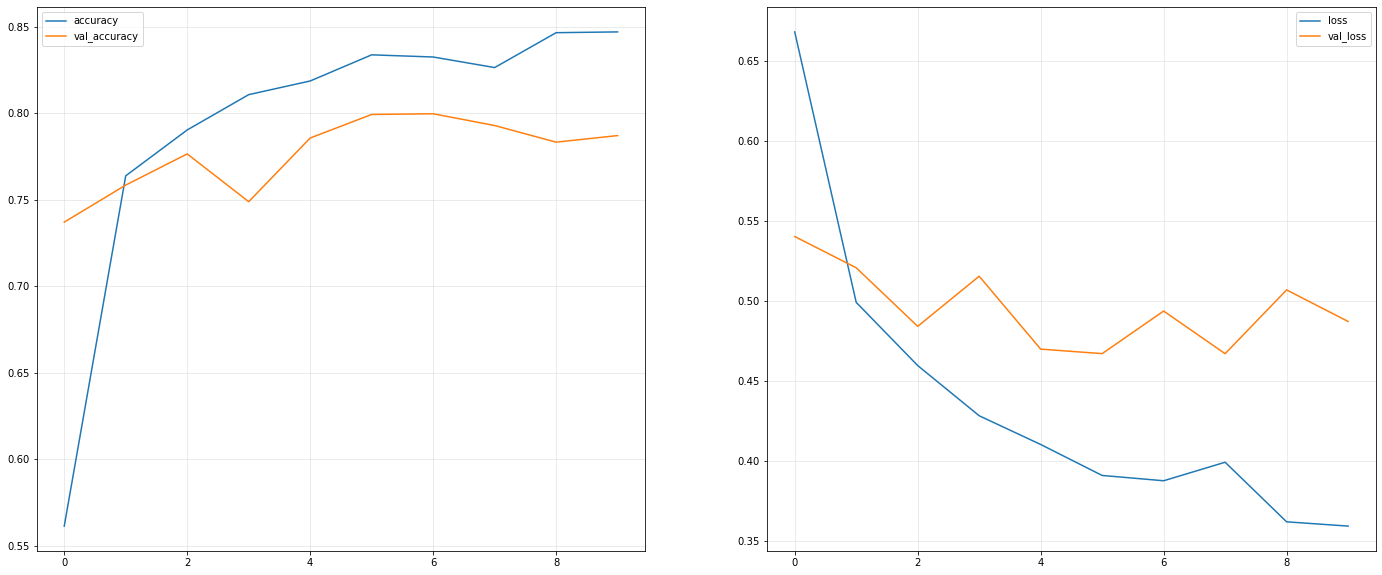

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (24,10))
plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.grid(True, alpha =0.3)

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid(True, alpha =0.3)

plt.show()

## Embedding RNN Model
---  
- One-Hot-Encoing 입력 데이터의 많은 메모리 소모에 대한 문제 입력
- 토큰을 밀집형태의 벡터로 변경 => Word Embedding
- Embedding Layer 적용
    * 입력 차원 - 토큰의 크기, 즉 단어사전의 크기
    * 출력 차원 - 줄여서 생성하는 벡터 크기
    * 입력층일 경우 : input_dim = 타임스템프, 즉 하나의 문장을 구성하는 토큰 수

In [39]:
from tensorflow.keras.layers import Embedding

In [42]:
model2 = Sequential()
model2.add(Embedding(500, 20, input_length = n_maxlen))
model2.add(SimpleRNN(10))
model.add(Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 180, 20)           10000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 10)                310       
                                                                 
Total params: 10,310
Trainable params: 10,310
Non-trainable params: 0
_________________________________________________________________
